In [2]:
from openTSNE import TSNE
from openTSNE.callbacks import ErrorLogger
import numpy as np

In [3]:
# pr = np.load('../data/processed/pr.npy')
# pr = np.transpose(pr, (0,2,1,3))
# pr = pr.reshape(1000,1000,40)
# pr = pr.reshape(1000000, 40)
h_3 = np.load('../data/processed/h_3.npy')
h_2 = np.load('../data/processed/h_2.npy')
h_1 = np.load('../data/processed/h_1.npy')
h_0 = np.load('../data/processed/h_0.npy')
h_3g = np.load('../data/processed/h_3_gan.npy')
h_2g = np.load('../data/processed/h_2_gan.npy')
h_1g = np.load('../data/processed/h_1_gan.npy')
h_0g = np.load('../data/processed/h_0_gan.npy')
Z_real = np.concatenate([h_0, h_1, h_2, h_3],axis=1)
Z_gan = np.concatenate([h_0g, h_1g, h_2g, h_3g],axis=1)

In [4]:
Z = Z_gan # np.vstack([Z_gan, Z_real])

In [5]:
tsne = TSNE(callbacks=ErrorLogger(), n_jobs=-1, learning_rate=Z.shape[0]/12, exaggeration=4)
# tsne = TSNE(callbacks=ErrorLogger(), n_jobs=-1)

In [6]:
embedded = tsne.fit(Z)

Iteration   50, KL divergence  4.6277, 50 iterations in 6.1891 sec
Iteration  100, KL divergence  4.0181, 50 iterations in 6.9720 sec
Iteration  150, KL divergence  3.8127, 50 iterations in 6.5800 sec
Iteration  200, KL divergence  3.7097, 50 iterations in 6.6520 sec
Iteration  250, KL divergence  3.6466, 50 iterations in 7.2720 sec
Iteration   50, KL divergence  3.0341, 50 iterations in 6.6108 sec
Iteration  100, KL divergence  2.8561, 50 iterations in 6.0560 sec
Iteration  150, KL divergence  2.7859, 50 iterations in 6.2720 sec
Iteration  200, KL divergence  2.7467, 50 iterations in 6.2040 sec
Iteration  250, KL divergence  2.7212, 50 iterations in 6.0040 sec
Iteration  300, KL divergence  2.7030, 50 iterations in 6.3960 sec
Iteration  350, KL divergence  2.6895, 50 iterations in 6.2880 sec
Iteration  400, KL divergence  2.6790, 50 iterations in 6.0971 sec
Iteration  450, KL divergence  2.6705, 50 iterations in 7.3950 sec
Iteration  500, KL divergence  2.6634, 50 iterations in 6.7920

In [7]:
embedding = embedded

In [23]:
np.save('gan_embedd', embedding)

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
plt.rcParams.update({'font.size': 30})

In [9]:
def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca();
    try:
        image = plt.imread(image);
    except TypeError:
        # Likely already an array...
        pass
    x, y = np.atleast_1d(x, y);
    artists = [];
    for i, (x0, y0) in enumerate(zip(x, y)):
        im = OffsetImage(image[i], zoom=zoom);
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False);
        artists.append(ax.add_artist(ab));
    ax.update_datalim(np.column_stack([x, y]));
    ax.autoscale();
    ax.grid(False);
    return artists

In [ ]:
with np.load('/home/etheredge/Workspace/tcvae/data/gan_generated_guppies_fewer_samples.npz') as f:
    gan_images, gan_labels = f['x_train'], f['y_train'].astype('int')
# real_labels = np.load("/home/etheredge/Workspace/tcvae/data/lines_trainVAE.npy")

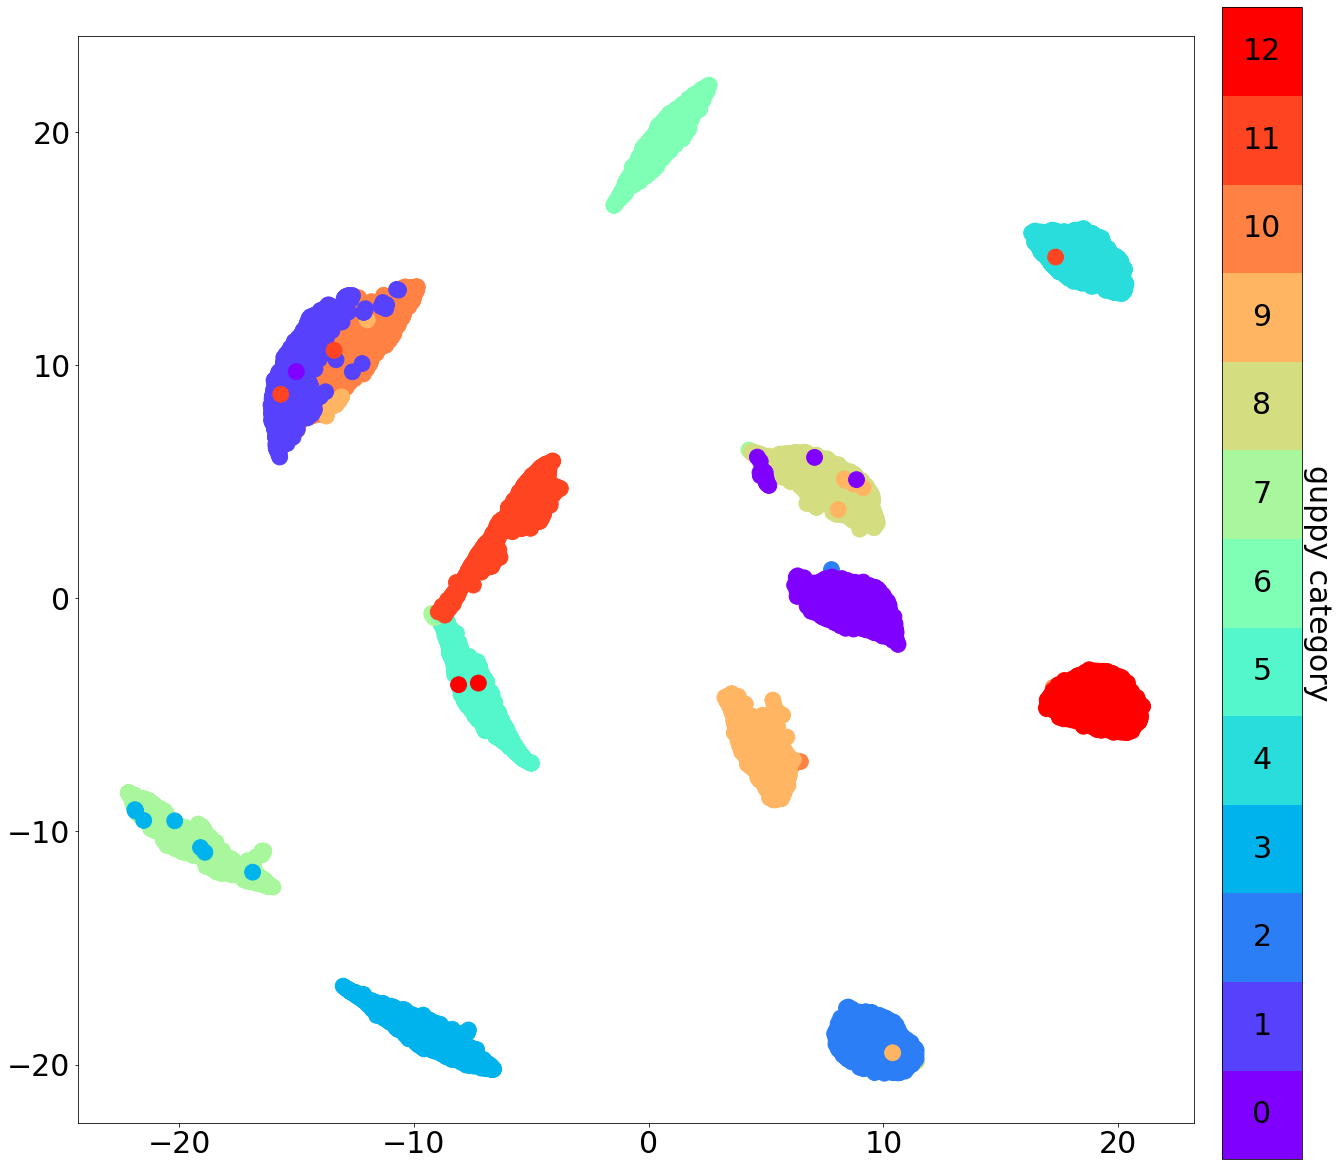

In [21]:


Y = np.array(gan_labels)
classnames, indices = np.unique(Y, return_inverse=True)
N = len(classnames)
cmap = plt.cm.rainbow
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
fig = plt.figure(figsize=(20,20))
scatter = plt.scatter(embedded[:, 0], embedded[:, 1],
        c=indices, cmap=cmap, norm=norm,s=250)
cbar_ax = fig.add_axes([0.92, 0.1, 0.055, 0.8])
cbar = fig.colorbar(scatter, cax=cbar_ax)
cbar.ax.set_yticklabels(classnames)
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(classnames):
    cbar.ax.text(.5, (2 * j + 1) / 26.0, lab, ha='center', va='center')
cbar.ax.get_yaxis().labelpad = 30
cbar.ax.set_ylabel('guppy category', rotation=270)
fig.savefig('gan_embedding.pdf')

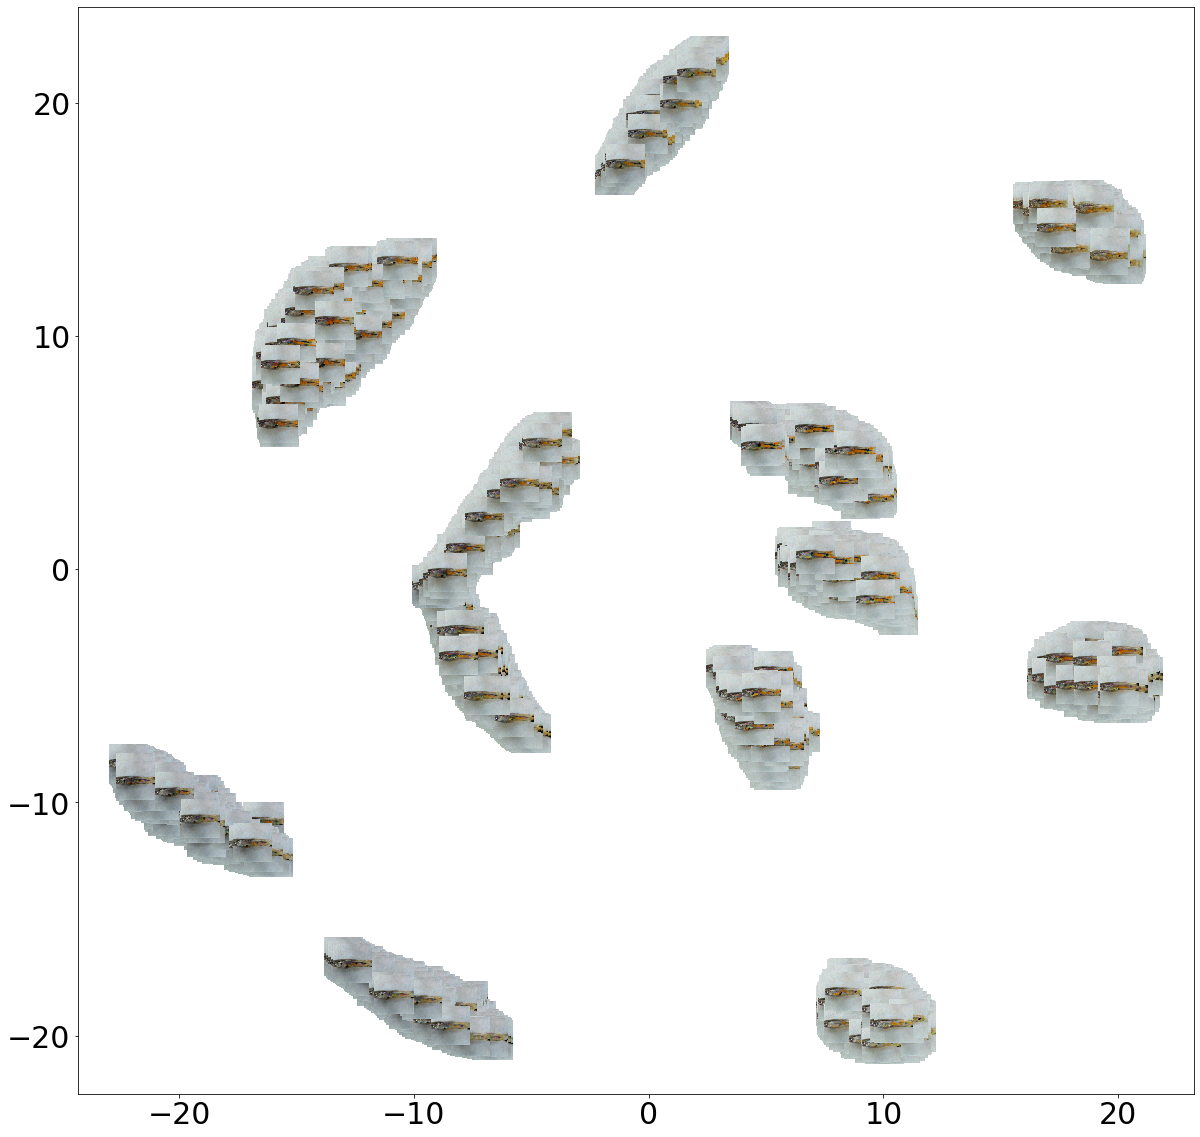

In [22]:
fig = plt.figure(figsize=(20,20))
imscatter(embedding[:, 0], embedding[:, 1], gan_images, zoom=0.15);
fig.savefig('gan_embedding_images.pdf')

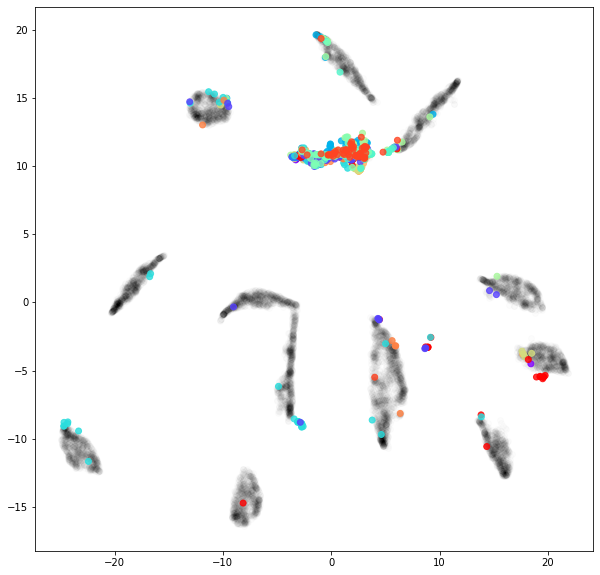

In [131]:
plt.figure(figsize=(10,10))
plt.scatter(embedded[:13000, 0], embedded[:13000, 1],c='k', alpha=0.01)
plt.scatter(embedded[13000:, 0], embedded[13000:, 1], alpha=0.8,
        c=indices, cmap=cmap, norm=norm,)